# Project 2: Term Deposit Determination

## Importing Modules And Defining Machine Learning Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import shap

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def run_regression_accuracy(X_train, y_train, X_test, y_test):   
    paramgrid = {'C': np.logspace(-8, 5, 15)}
    grid_search = GridSearchCV(LogisticRegression(), paramgrid)
    
    grid_search.fit(X_train, y_train)
    logreg = grid_search.best_estimator_
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('LOGISTIC REGRESSION RESULTS.png')
    plt.show()
  
    return logreg

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

def run_random_forest_accuracy(X_train, y_train, X_test, y_test):   
    paramgrid = {'max_depth': list(range(1, 15, 2)), 'n_estimators': list(range(1, 200, 20))}
    grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid) # Could do a RandomizedSearchCV to save computing.
    
    grid_search.fit(X_train, y_train)
    logreg = grid_search.best_estimator_
    y_pred = logreg.predict(X_test)
    print('Accuracy of random forest classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('RANDOM FOREST RESULTS.png')
    plt.show()
  
    return logreg

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def run_decision_tree_accuracy(X_train, y_train, X_test, y_test):   
    paramgrid = {'max_depth': list(range(1, 20, 2))
                }
    grid_search = RandomizedSearchCV(DecisionTreeClassifier(), paramgrid, cv=5) # Could do a RandomizedSearchCV to save computing.
    
    grid_search.fit(X_train, y_train)
    logreg = grid_search.best_estimator_
    y_pred = logreg.predict(X_test)
    print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n',cm)

    print('\nClassification report: \n',classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('RANDOM FOREST RESULTS.png')
    plt.show()
  
    return logreg

In [6]:
file = pd.read_csv('term-deposit-marketing-2020.csv') # reading the file

In [7]:
file.head() # visual confirmation of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [8]:
file.info() # inspecting the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Splitting up the file into a training file and a testing file

In [9]:
X = file.drop(['y'], axis=1)
y = file['y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
Training_file = X_train.join(y_train)

In [12]:
Testing_file = X_test.join(y_test)

## Working With The Training File Only From Here On Testing File Used Later

### Class Distribution Of Target Variable In Training File

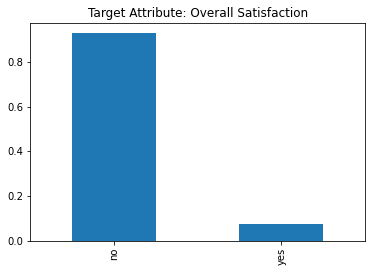

In [13]:
Training_file["y"].value_counts(normalize=True).plot.bar(title='Target Attribute: Overall Satisfaction')
plt.show() # visual distribution of the two different class frequencies.

### Creation Of file_zero From Column Selection

In [14]:
file_zero = Training_file[['age', 'marital', 'balance', 'duration', 'campaign', 'education', 'default', 'housing', 'loan', 'y']] # gathering all variables unchanged
file_zero.head()

,age,marital,balance,duration,campaign,education,default,housing,loan,y
20643,40,married,4396,432,3,secondary,no,no,no,yes
30774,34,married,196,59,3,secondary,no,no,no,no
21890,38,single,38,105,2,tertiary,no,no,no,no
21611,60,married,2149,222,4,tertiary,no,no,no,no
35368,51,divorced,57,355,1,primary,no,yes,yes,no


In [15]:
file_zero_Test = Testing_file[['age', 'marital', 'balance', 'duration', 'campaign', 'education', 'default', 'housing', 'loan', 'y']]
file_zero_Test.head()

,age,marital,balance,duration,campaign,education,default,housing,loan,y
32823,48,divorced,266,198,2,tertiary,no,yes,no,no
16298,53,divorced,84,336,1,secondary,no,no,no,no
28505,43,divorced,3578,376,2,tertiary,no,no,no,no
6689,38,married,133,156,1,secondary,no,yes,no,no
26893,42,married,4014,149,4,tertiary,no,yes,no,no


In [16]:
file_zero['education'].replace('tertiary', '3', inplace=True)
file_zero['education'].replace('secondary', '2', inplace=True)
file_zero['education'].replace('primary', '1', inplace=True)
file_zero['education'].replace('unknown', '0', inplace=True) # numbering education column
file_zero['default'].replace('no', '0', inplace=True)
file_zero['default'].replace('yes', '1', inplace=True) # numbering default column
file_zero['housing'].replace('no', '0', inplace=True)
file_zero['housing'].replace('yes', '1', inplace=True) # numbering the housing column
file_zero['loan'].replace('no', '0', inplace=True)
file_zero['loan'].replace('yes', '1', inplace=True)
file_zero['y'].replace('no', '0', inplace=True)
file_zero['y'].replace('yes', '1', inplace=True) # numbering the y column
file_zero.head()

,age,marital,balance,duration,campaign,education,default,housing,loan,y
20643,40,married,4396,432,3,2,0,0,0,1
30774,34,married,196,59,3,2,0,0,0,0
21890,38,single,38,105,2,3,0,0,0,0
21611,60,married,2149,222,4,3,0,0,0,0
35368,51,divorced,57,355,1,1,0,1,1,0


In [17]:
file_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 20643 to 15795
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        24000 non-null  int64 
 1   marital    24000 non-null  object
 2   balance    24000 non-null  int64 
 3   duration   24000 non-null  int64 
 4   campaign   24000 non-null  int64 
 5   education  24000 non-null  object
 6   default    24000 non-null  object
 7   housing    24000 non-null  object
 8   loan       24000 non-null  object
 9   y          24000 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


In [18]:
file_zero_Test['education'].replace('tertiary', '3', inplace=True)
file_zero_Test['education'].replace('secondary', '2', inplace=True)
file_zero_Test['education'].replace('primary', '1', inplace=True)
file_zero_Test['education'].replace('unknown', '0', inplace=True) # numbering education column
file_zero_Test['default'].replace('no', '0', inplace=True)
file_zero_Test['default'].replace('yes', '1', inplace=True) # numbering default column
file_zero_Test['housing'].replace('no', '0', inplace=True)
file_zero_Test['housing'].replace('yes', '1', inplace=True) # numbering the housing column
file_zero_Test['loan'].replace('no', '0', inplace=True)
file_zero_Test['loan'].replace('yes', '1', inplace=True)
file_zero_Test['y'].replace('no', '0', inplace=True)
file_zero_Test['y'].replace('yes', '1', inplace=True) # numbering the y column
file_zero_Test.head()

,age,marital,balance,duration,campaign,education,default,housing,loan,y
32823,48,divorced,266,198,2,3,0,1,0,0
16298,53,divorced,84,336,1,2,0,0,0,0
28505,43,divorced,3578,376,2,3,0,0,0,0
6689,38,married,133,156,1,2,0,1,0,0
26893,42,married,4014,149,4,3,0,1,0,0


In [19]:
file_zero_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 32823 to 18765
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        16000 non-null  int64 
 1   marital    16000 non-null  object
 2   balance    16000 non-null  int64 
 3   duration   16000 non-null  int64 
 4   campaign   16000 non-null  int64 
 5   education  16000 non-null  object
 6   default    16000 non-null  object
 7   housing    16000 non-null  object
 8   loan       16000 non-null  object
 9   y          16000 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [20]:
marital_status = pd.get_dummies(file_zero['marital']) # combined dummy variables for marriage
file_zero['divorced'] = marital_status['divorced']
file_zero['married'] = marital_status['married']
file_zero['single'] = marital_status['single']
file_zero = file_zero.drop(['marital'], axis=1) # dropped the marital status column
file_zero.head() # job is omitted right now because dummy variables will overcomplicate algorithm, will employ later if neccessary.

,age,balance,duration,campaign,education,default,housing,loan,y,divorced,married,single
20643,40,4396,432,3,2,0,0,0,1,0,1,0
30774,34,196,59,3,2,0,0,0,0,0,1,0
21890,38,38,105,2,3,0,0,0,0,0,0,1
21611,60,2149,222,4,3,0,0,0,0,0,1,0
35368,51,57,355,1,1,0,1,1,0,1,0,0


In [21]:
file_zero = file_zero.astype("float64") # changed all the types in the table to float64 for machine learning algorithms
file_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 20643 to 15795
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        24000 non-null  float64
 1   balance    24000 non-null  float64
 2   duration   24000 non-null  float64
 3   campaign   24000 non-null  float64
 4   education  24000 non-null  float64
 5   default    24000 non-null  float64
 6   housing    24000 non-null  float64
 7   loan       24000 non-null  float64
 8   y          24000 non-null  float64
 9   divorced   24000 non-null  float64
 10  married    24000 non-null  float64
 11  single     24000 non-null  float64
dtypes: float64(12)
memory usage: 2.9 MB


In [22]:
marital_status_Test = pd.get_dummies(file_zero_Test['marital']) # combined dummy variables for marriage
file_zero_Test['divorced'] = marital_status_Test['divorced']
file_zero_Test['married'] = marital_status_Test['married']
file_zero_Test['single'] = marital_status_Test['single']
file_zero_Test = file_zero_Test.drop(['marital'], axis=1) # dropped the marital status column
file_zero_Test.head()

,age,balance,duration,campaign,education,default,housing,loan,y,divorced,married,single
32823,48,266,198,2,3,0,1,0,0,1,0,0
16298,53,84,336,1,2,0,0,0,0,1,0,0
28505,43,3578,376,2,3,0,0,0,0,1,0,0
6689,38,133,156,1,2,0,1,0,0,0,1,0
26893,42,4014,149,4,3,0,1,0,0,0,1,0


In [23]:
file_zero_Test = file_zero_Test.astype("float64") # changed all the types in the table to float64 for machine learning algorithms
file_zero_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 32823 to 18765
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        16000 non-null  float64
 1   balance    16000 non-null  float64
 2   duration   16000 non-null  float64
 3   campaign   16000 non-null  float64
 4   education  16000 non-null  float64
 5   default    16000 non-null  float64
 6   housing    16000 non-null  float64
 7   loan       16000 non-null  float64
 8   y          16000 non-null  float64
 9   divorced   16000 non-null  float64
 10  married    16000 non-null  float64
 11  single     16000 non-null  float64
dtypes: float64(12)
memory usage: 2.1 MB


In [24]:
file_zero = file_zero[['age', 'balance', 'duration', 'campaign', 'education', 'default', 'housing', 'loan', 'divorced', 'married', 'single', 'y']]
file_zero.head() # Now the data is ready to be split and put through machine learning algorithms

,age,balance,duration,campaign,education,default,housing,loan,divorced,married,single,y
20643,40.0,4396.0,432.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
30774,34.0,196.0,59.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21890,38.0,38.0,105.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21611,60.0,2149.0,222.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35368,51.0,57.0,355.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [25]:
file_zero_Test = file_zero_Test[['age', 'balance', 'duration', 'campaign', 'education', 'default', 'housing', 'loan', 'divorced', 'married', 'single', 'y']]
file_zero_Test.head()

,age,balance,duration,campaign,education,default,housing,loan,divorced,married,single,y
32823,48.0,266.0,198.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
16298,53.0,84.0,336.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28505,43.0,3578.0,376.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6689,38.0,133.0,156.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
26893,42.0,4014.0,149.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


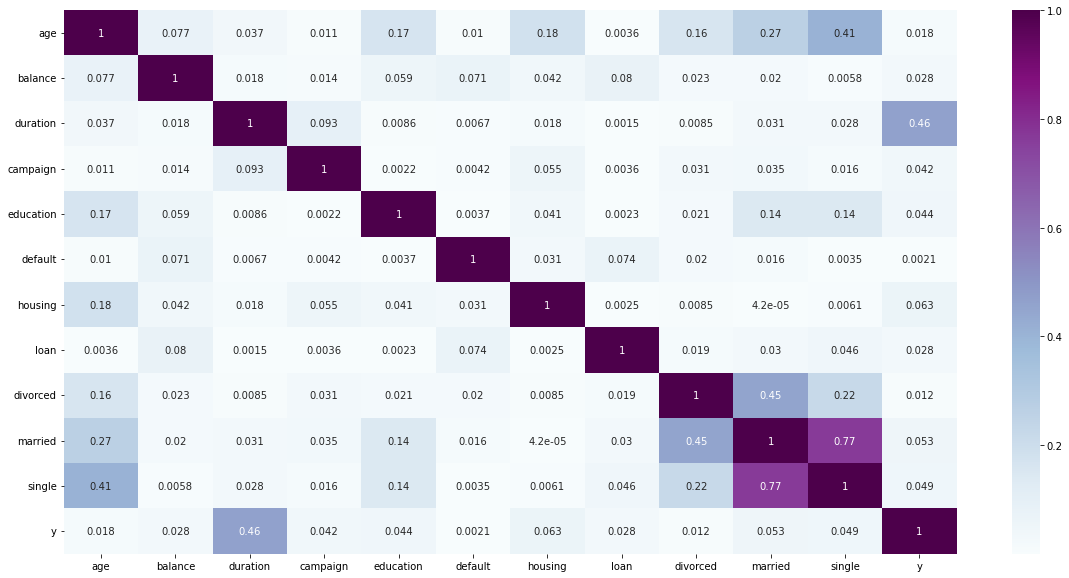

In [26]:
plt.figure(figsize=(20, 10))
file_zero.corr().abs()
z = file_zero.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')
plt.show()

There's a strong correlation between married and single columns, but these columns are a dummy variable situation and maybe only married needs to be present.

In [27]:
file_zero = file_zero.drop(['single', 'divorced'], axis=1)
file_zero.head()

,age,balance,duration,campaign,education,default,housing,loan,married,y
20643,40.0,4396.0,432.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0
30774,34.0,196.0,59.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0
21890,38.0,38.0,105.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
21611,60.0,2149.0,222.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0
35368,51.0,57.0,355.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


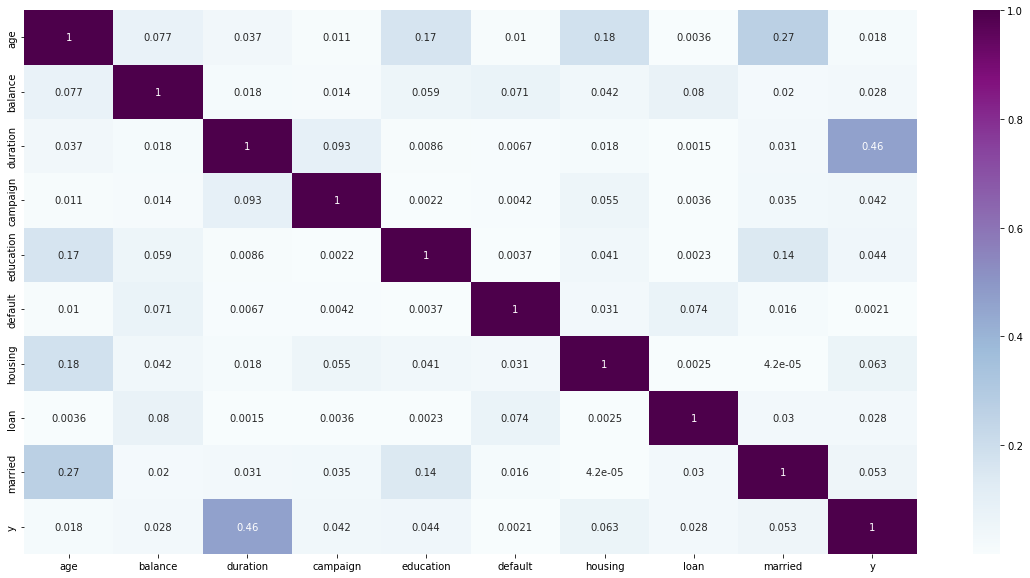

In [28]:
plt.figure(figsize=(20, 10))
file_zero.corr().abs()
z = file_zero.corr().abs()
sns.heatmap(data=z, annot=True, cmap='BuPu')
plt.show()

In [29]:
file_zero_Test = file_zero_Test.drop(['single', 'divorced'], axis=1)
file_zero_Test.head()

,age,balance,duration,campaign,education,default,housing,loan,married,y
32823,48.0,266.0,198.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
16298,53.0,84.0,336.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
28505,43.0,3578.0,376.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
6689,38.0,133.0,156.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0
26893,42.0,4014.0,149.0,4.0,3.0,0.0,1.0,0.0,1.0,0.0


### Splitting Up The File Into Training And Testing Sets

In [30]:
X_zero = file_zero.drop(['y'], axis=1)
y_zero = file_zero['y']

In [31]:
X_train_zero, X_test_zero, y_train_zero, y_test_zero = train_test_split(X_zero, y_zero, test_size=0.4, random_state=42)

### Running file_zero through the machine learning algorithms; test results for training data

#### Logistic Regression

Accuracy of logistic regression classifier on test set: 0.93

Confusion matrix: 
 [[8806  110]
 [ 550  134]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      8916
         1.0       0.55      0.20      0.29       684

    accuracy                           0.93      9600
   macro avg       0.75      0.59      0.63      9600
weighted avg       0.91      0.93      0.92      9600



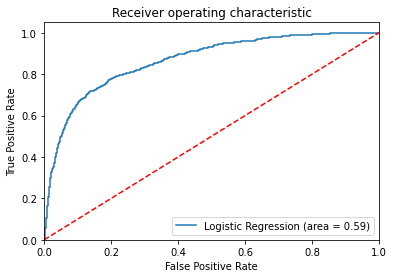

LogisticRegression(C=5.1794746792312125e-05)

In [32]:
run_regression_accuracy(X_train_zero, y_train_zero, X_test_zero, y_test_zero)

#### Random Forest

Accuracy of random forest classifier on test set: 0.93

Confusion matrix: 
 [[8763  153]
 [ 526  158]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      8916
         1.0       0.51      0.23      0.32       684

    accuracy                           0.93      9600
   macro avg       0.73      0.61      0.64      9600
weighted avg       0.91      0.93      0.92      9600



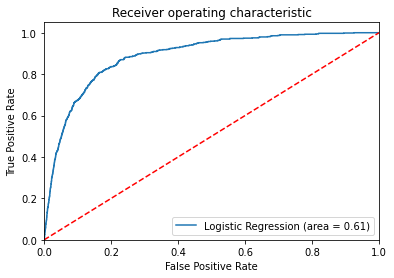

RandomForestClassifier(max_depth=11, n_estimators=41, random_state=1)

In [33]:
run_random_forest_accuracy(X_train_zero, y_train_zero, X_test_zero, y_test_zero)

#### Decision Tree

Accuracy of decision tree on test set: 0.93

Confusion matrix: 
 [[8791  125]
 [ 537  147]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      8916
         1.0       0.54      0.21      0.31       684

    accuracy                           0.93      9600
   macro avg       0.74      0.60      0.64      9600
weighted avg       0.91      0.93      0.92      9600



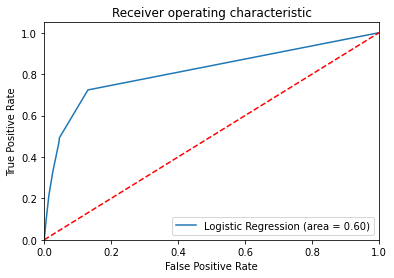

DecisionTreeClassifier(max_depth=3)

In [34]:
run_decision_tree_accuracy(X_train_zero, y_train_zero, X_test_zero, y_test_zero)

The class imbalance with file_zero caused mis-classification of positive classes.  Now, the origional training data will be re-used and transformed into a new data set with a balance class distribution.  The process will be sampling the positive class set with replacement and concatenating the positives to the training dataset to create a new file called file_one.

# Extracting positive samples from the Training File

In [35]:
positive_samples = file_zero.loc[file['y'] == 'yes'] # extracting all rows with positive class
positive_samples

,age,balance,duration,campaign,education,default,housing,loan,married,y
20643,40.0,4396.0,432.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0
38428,28.0,341.0,437.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0
15050,52.0,1405.0,753.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0
9578,35.0,68.0,1085.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
12320,27.0,335.0,519.0,3.0,3.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8392,31.0,86.0,963.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0
13986,26.0,45.0,1187.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0
39099,29.0,476.0,427.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0
16023,35.0,328.0,654.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0


In [36]:
file_zero['y'].value_counts() # Numerical confirmation

0.0    22263
1.0     1737
Name: y, dtype: int64

In [37]:
file_zero.loc[file['y'] == 'no'].count() - file_zero.loc[file['y'] == 'yes'].count() # difference between number of each class cases so that the number of samples can be determined

age          20526
balance      20526
duration     20526
campaign     20526
education    20526
default      20526
housing      20526
loan         20526
married      20526
y            20526
dtype: int64

In [38]:
new_positive_examples = positive_samples.sample(n=27360, replace=True, random_state=0)
new_positive_examples # oversampling positive class scenarios to equalize negative case scenarios

,age,balance,duration,campaign,education,default,housing,loan,married,y
39881,50.0,3370.0,160.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
30803,22.0,0.0,229.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0
29430,53.0,6112.0,211.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0
37020,36.0,319.0,774.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
29293,26.0,15161.0,280.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19249,35.0,146.0,720.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0
26250,32.0,6402.0,628.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
34017,31.0,2016.0,209.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
27105,57.0,372.0,553.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0


In [39]:
combined_file = [new_positive_examples, file_zero]
combined_file = pd.concat(combined_file)
combined_file # new data where positive and negative cases are balanced

,age,balance,duration,campaign,education,default,housing,loan,married,y
39881,50.0,3370.0,160.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
30803,22.0,0.0,229.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0
29430,53.0,6112.0,211.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0
37020,36.0,319.0,774.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0
29293,26.0,15161.0,280.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6265,32.0,13.0,88.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
11284,44.0,1059.0,2093.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
38158,34.0,1317.0,239.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
860,33.0,165.0,111.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0


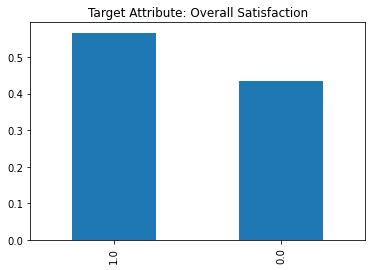

In [40]:
combined_file["y"].value_counts(normalize=True).plot.bar(title='Target Attribute: Overall Satisfaction')
plt.show() # Now the classes are even.

In [41]:
combined_file.info() # The combined file will be the training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51360 entries, 39881 to 15795
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        51360 non-null  float64
 1   balance    51360 non-null  float64
 2   duration   51360 non-null  float64
 3   campaign   51360 non-null  float64
 4   education  51360 non-null  float64
 5   default    51360 non-null  float64
 6   housing    51360 non-null  float64
 7   loan       51360 non-null  float64
 8   married    51360 non-null  float64
 9   y          51360 non-null  float64
dtypes: float64(10)
memory usage: 4.3 MB


All variables now look independent.  Notable, duration has the highest correlation and might be indicative of it's importance.

## Splitting up the data into a training set and a test set reserved for testing

In [42]:
X_one = combined_file.drop(['y'], axis=1)
y_one = combined_file['y']

In [43]:
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y_one, test_size=0.4, random_state=42)

#### Logistic Regression

Accuracy of logistic regression classifier on test set: 0.81

Confusion matrix: 
 [[7118 1823]
 [2036 9567]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      8941
         1.0       0.84      0.82      0.83     11603

    accuracy                           0.81     20544
   macro avg       0.81      0.81      0.81     20544
weighted avg       0.81      0.81      0.81     20544



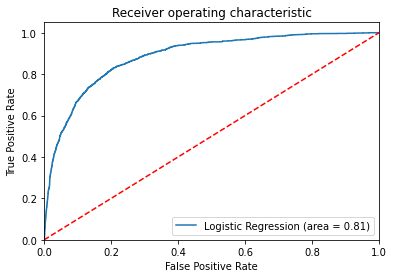

LogisticRegression(C=2.275845926074791)

In [44]:
run_regression_accuracy(X_train_one, y_train_one, X_test_one, y_test_one)

#### Random Forest

Accuracy of random forest classifier on test set: 0.94

Confusion matrix: 
 [[ 7837  1104]
 [  118 11485]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      8941
         1.0       0.91      0.99      0.95     11603

    accuracy                           0.94     20544
   macro avg       0.95      0.93      0.94     20544
weighted avg       0.94      0.94      0.94     20544



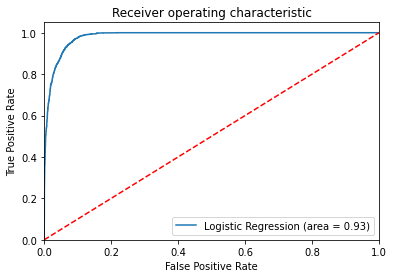

RandomForestClassifier(max_depth=13, n_estimators=61, random_state=1)

In [45]:
run_random_forest_accuracy(X_train_one, y_train_one, X_test_one, y_test_one)

#### Decision Tree

Accuracy of decision tree on test set: 0.96

Confusion matrix: 
 [[ 8126   815]
 [    9 11594]]

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      8941
         1.0       0.93      1.00      0.97     11603

    accuracy                           0.96     20544
   macro avg       0.97      0.95      0.96     20544
weighted avg       0.96      0.96      0.96     20544



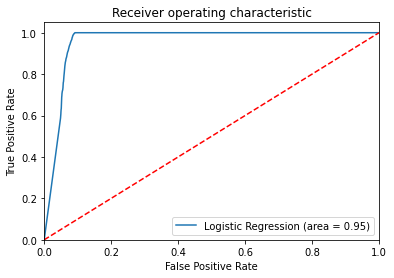

DecisionTreeClassifier(max_depth=19)

In [46]:
run_decision_tree_accuracy(X_train_one, y_train_one, X_test_one, y_test_one)

Balancing the classes did work with the dataset.  The best machine learning algorithm is a decision tree with a max_depth of 19.

In [47]:
X_zero_Test = file_zero_Test.drop(['y'], axis=1)
y_zero_Test = file_zero_Test['y']

### Running algorithms through the test data set

Accuracy of decision tree on test set: 0.88

Confusion matrix: 
 [[13506  1335]
 [  567   592]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93     14841
         1.0       0.31      0.51      0.38      1159

    accuracy                           0.88     16000
   macro avg       0.63      0.71      0.66     16000
weighted avg       0.91      0.88      0.89     16000



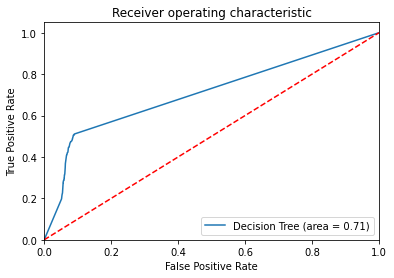

In [48]:
paramgrid = {'max_depth': list(range(1, 20, 2))
                }
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), paramgrid, cv=5) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_train_one, y_train_one)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_Test)
print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_zero_Test, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_Test))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_Test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DECISION TREE RESULTS.png')
plt.show()

In [49]:
logreg

DecisionTreeClassifier(max_depth=19)

In [50]:
import imblearn
from imblearn.over_sampling import SMOTE

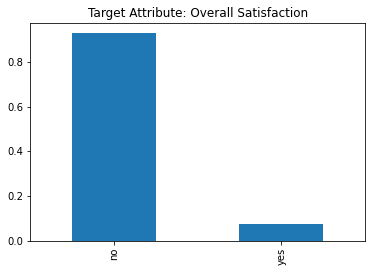

In [51]:
Training_file["y"].value_counts(normalize=True).plot.bar(title='Target Attribute: Overall Satisfaction')
plt.show()

In [52]:
X_zero = file_zero.drop(['y'], axis=1)
y_zero = file_zero['y']

In [53]:
oversample = SMOTE()
X_two, y_two = oversample.fit_resample(X_zero, y_zero)

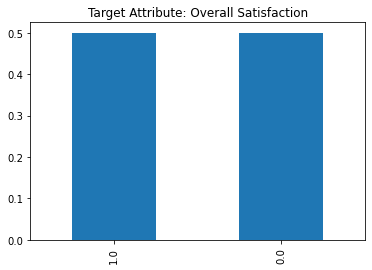

In [54]:
y_two.value_counts(normalize=True).plot.bar(title='Target Attribute: Overall Satisfaction')
plt.show()

In [55]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.4, random_state=42)

Accuracy of logistic regression classifier on test set: 0.81

Confusion matrix: 
 [[7462 1451]
 [2010 6888]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      8913
         1.0       0.83      0.77      0.80      8898

    accuracy                           0.81     17811
   macro avg       0.81      0.81      0.81     17811
weighted avg       0.81      0.81      0.81     17811



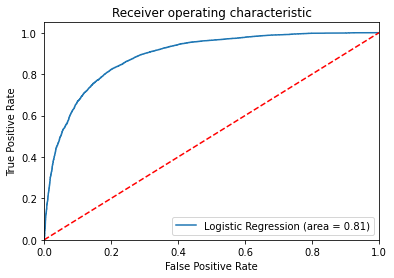

LogisticRegression(C=19.306977288832535)

In [56]:
run_regression_accuracy(X_train_two, y_train_two, X_test_two, y_test_two)

Accuracy of random forest classifier on test set: 0.94

Confusion matrix: 
 [[8414  499]
 [ 560 8338]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      8913
         1.0       0.94      0.94      0.94      8898

    accuracy                           0.94     17811
   macro avg       0.94      0.94      0.94     17811
weighted avg       0.94      0.94      0.94     17811



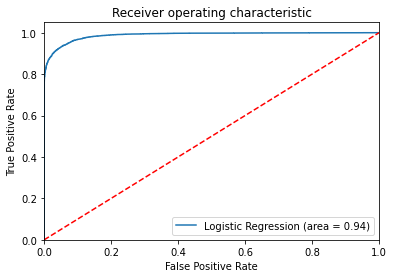

RandomForestClassifier(max_depth=11, n_estimators=21, random_state=1)

In [57]:
run_random_forest_accuracy(X_train_two, y_train_two, X_test_two, y_test_two)

Accuracy of decision tree on test set: 0.93

Confusion matrix: 
 [[8332  581]
 [ 621 8277]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      8913
         1.0       0.93      0.93      0.93      8898

    accuracy                           0.93     17811
   macro avg       0.93      0.93      0.93     17811
weighted avg       0.93      0.93      0.93     17811



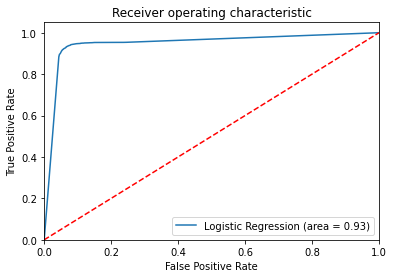

DecisionTreeClassifier(max_depth=15)

In [58]:
run_decision_tree_accuracy(X_train_two, y_train_two, X_test_two, y_test_two)

Accuracy of decision tree on test set: 0.90

Confusion matrix: 
 [[13886   955]
 [  713   446]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     14841
         1.0       0.32      0.38      0.35      1159

    accuracy                           0.90     16000
   macro avg       0.63      0.66      0.65     16000
weighted avg       0.91      0.90      0.90     16000



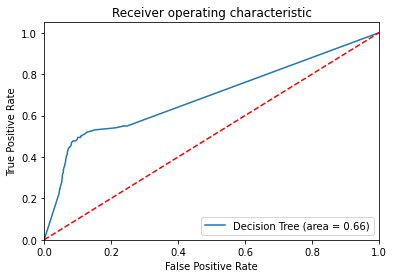

In [59]:
paramgrid = {'max_depth': list(range(1, 20, 2))
                }
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), paramgrid, cv=5) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_train_two, y_train_two)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_Test)
print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_zero_Test, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_Test))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_Test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DECISION TREE RESULTS.png')
plt.show()

Accuracy of decision tree on test set: 0.91

Confusion matrix: 
 [[13934   907]
 [  511   648]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     14841
         1.0       0.42      0.56      0.48      1159

    accuracy                           0.91     16000
   macro avg       0.69      0.75      0.71     16000
weighted avg       0.92      0.91      0.92     16000



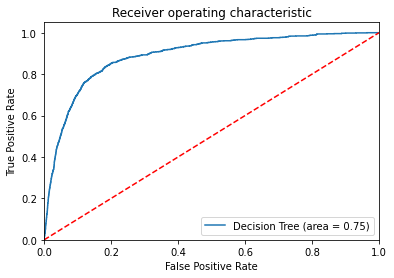

In [60]:
paramgrid = {'max_depth': list(range(1, 15, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_train_two, y_train_two)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_Test)
print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_zero_Test, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_Test))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_Test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DECISION TREE RESULTS.png')
plt.show()

### Trying out ADASYN to see if test accuracy and ROC scores improve

In [61]:
from imblearn.over_sampling import ADASYN

In [62]:
oversample_two = ADASYN()

In [63]:
X_three, y_three = oversample_two.fit_resample(X_zero, y_zero)

In [64]:
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, test_size=0.4, random_state=42)

### Observing the test scores on the training data

Accuracy of logistic regression classifier on test set: 0.78

Confusion matrix: 
 [[7176 1740]
 [2163 6790]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      8916
         1.0       0.80      0.76      0.78      8953

    accuracy                           0.78     17869
   macro avg       0.78      0.78      0.78     17869
weighted avg       0.78      0.78      0.78     17869



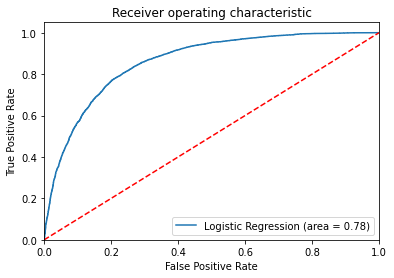

LogisticRegression(C=163.7893706954068)

In [65]:
run_regression_accuracy(X_train_three, y_train_three, X_test_three, y_test_three)

Accuracy of decision tree on test set: 0.93

Confusion matrix: 
 [[8275  641]
 [ 546 8407]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      8916
         1.0       0.93      0.94      0.93      8953

    accuracy                           0.93     17869
   macro avg       0.93      0.93      0.93     17869
weighted avg       0.93      0.93      0.93     17869



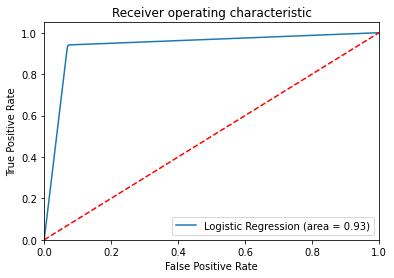

DecisionTreeClassifier(max_depth=19)

In [66]:
run_decision_tree_accuracy(X_train_three, y_train_three, X_test_three, y_test_three)

Accuracy of random forest classifier on test set: 0.95

Confusion matrix: 
 [[8497  419]
 [ 502 8451]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      8916
         1.0       0.95      0.94      0.95      8953

    accuracy                           0.95     17869
   macro avg       0.95      0.95      0.95     17869
weighted avg       0.95      0.95      0.95     17869



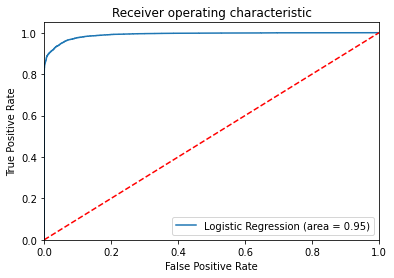

RandomForestClassifier(max_depth=13, n_estimators=141, random_state=1)

In [67]:
run_random_forest_accuracy(X_train_three, y_train_three, X_test_three, y_test_three)

### Observing the accuracy/ROC scores on testing data using ADASYN

Accuracy of random forest on test set: 0.92

Confusion matrix: 
 [[14186   655]
 [  645   514]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     14841
         1.0       0.44      0.44      0.44      1159

    accuracy                           0.92     16000
   macro avg       0.70      0.70      0.70     16000
weighted avg       0.92      0.92      0.92     16000



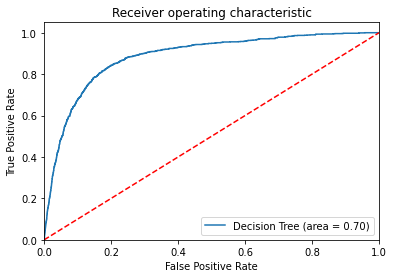

In [68]:
paramgrid = {'max_depth': list(range(1, 15, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_train_three, y_train_three)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_Test)
print('Accuracy of random forest on test set: {:.2f}'.format(logreg.score(X_zero_Test, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_Test))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_Test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RANDOM FOREST RESULTS.png')
plt.show()

Accuracy of decision tree on test set: 0.89

Confusion matrix: 
 [[13839  1002]
 [  710   449]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     14841
         1.0       0.31      0.39      0.34      1159

    accuracy                           0.89     16000
   macro avg       0.63      0.66      0.64     16000
weighted avg       0.90      0.89      0.90     16000



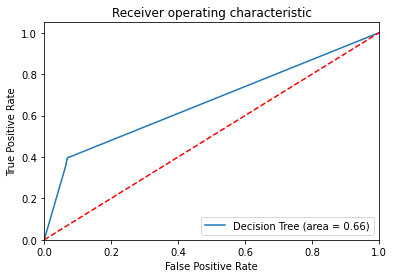

In [69]:
paramgrid = {'max_depth': list(range(1, 20, 2))
                }
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), paramgrid, cv=5) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_train_three, y_train_three)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_Test)
print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_zero_Test, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_Test))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_Test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DECISION TREE RESULTS.png')
plt.show()

### Duration is the strongest determinant for the target variable and can be used with reasonable accuracy to determine target variable

In [74]:
X_duration = X_train_three[['duration']]
y_train_three.head()

18729    0.0
40744    1.0
2468     0.0
44079    1.0
33984    1.0
Name: y, dtype: float64

In [76]:
X_zero_test_duration = X_zero_Test[['duration']]
X_zero_test_duration.head()

,duration
32823,198.0
16298,336.0
28505,376.0
6689,156.0
26893,149.0


In [82]:
X_train_three_duration = X_train_three['duration'].head()
X_train_three_duration.head()

18729     129.000000
40744    1081.897839
2468      158.000000
44079     557.586480
33984     294.626448
Name: duration, dtype: float64

Accuracy of decision tree on test set: 0.80

Confusion matrix: 
 [[12120  2721]
 [  418   741]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     14841
         1.0       0.21      0.64      0.32      1159

    accuracy                           0.80     16000
   macro avg       0.59      0.73      0.60     16000
weighted avg       0.91      0.80      0.84     16000



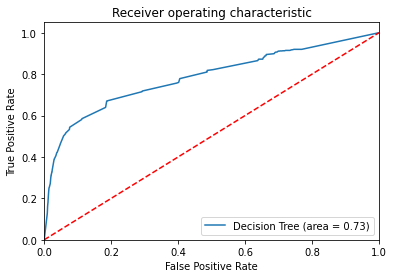

In [87]:
paramgrid = {'max_depth': list(range(1, 20, 2))
                }
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), paramgrid, cv=5) # Could do a RandomizedSearchCV to save computing.
    
grid_search.fit(X_duration, y_train_three)
logreg = grid_search.best_estimator_
y_pred = logreg.predict(X_zero_test_duration)
print('Accuracy of decision tree on test set: {:.2f}'.format(logreg.score(X_zero_test_duration, y_zero_Test)))
cm = confusion_matrix(y_zero_Test, y_pred)
print('\nConfusion matrix: \n',cm)

print('\nClassification report: \n',classification_report(y_zero_Test, y_pred))

logit_roc_auc = roc_auc_score(y_zero_Test, logreg.predict(X_zero_test_duration))
fpr, tpr, thresholds = roc_curve(y_zero_Test, logreg.predict_proba(X_zero_test_duration)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DECISION TREE RESULTS.png')
plt.show()

Duration alone provides scores comparable if not slightly better than the entire training set using ADASYN.